In [9]:
import os.path as op 
import tempfile 
import matplotlib.pyplot as plt 

import hnn_core
from hnn_core import jones_2009_model, simulate_dipole
from hnn_core.viz import plot_dipole
from hnn_core import JoblibBackend

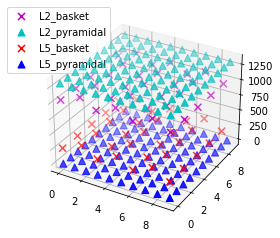

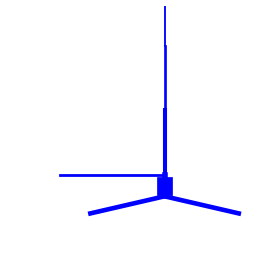

<Axes3DSubplot: >

In [8]:
#default network 
net = jones_2009_model()
net.plot_cells()
net.cell_types['L5_pyramidal'].plot_morphology()

In [ ]:
# Distal Drive - need to update based on my simulation
weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': .000007,
                   'L5_pyramidal': 0.142300}
weights_nmda_d1 = {'L2_basket': 0.019482, 'L2_pyramidal': 0.004317,
                   'L5_pyramidal': 0.080074}
synaptic_delays_d1 = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                      'L5_pyramidal': 0.1}
net.add_evoked_drive(
    'evdist1', mu=63.53, sigma=3.85, numspikes=1, weights_ampa=weights_ampa_d1,
    weights_nmda=weights_nmda_d1, location='distal',
    synaptic_delays=synaptic_delays_d1, event_seed=274)

In [ ]:
#Proximal Drives - need to update based on my simulation 
weights_ampa_p1 = {'L2_basket': 0.08831, 'L2_pyramidal': 0.01525,
                   'L5_basket': 0.19934, 'L5_pyramidal': 0.00865}
synaptic_delays_prox = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                        'L5_basket': 1., 'L5_pyramidal': 1.}
# all NMDA weights are zero; pass None explicitly
net.add_evoked_drive(
    'evprox1', mu=26.61, sigma=2.47, numspikes=1, weights_ampa=weights_ampa_p1,
    weights_nmda=None, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=544)

# Second proximal evoked drive. NB: only AMPA weights differ from first
weights_ampa_p2 = {'L2_basket': 0.000003, 'L2_pyramidal': 1.438840,
                   'L5_basket': 0.008958, 'L5_pyramidal': 0.684013}
# all NMDA weights are zero; omit weights_nmda (defaults to None)
net.add_evoked_drive(
    'evprox2', mu=137.12, sigma=8.33, numspikes=1,
    weights_ampa=weights_ampa_p2, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=814)

In [ ]:
#simulate dipole, running 2 jobs 
#joblib allows jobs to run in parallel 
with JoblibBackend(n_jobs=2):
    dpls = simulate_dipole(net, tstop=170., n_trials=2)

In [ ]:
#smoothing and scaling 
window_len, scaling_factor = 30, 3000
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)

In [ ]:
#plt simulated aggregated dipole moments over time 
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6),
                         constrained_layout=True)
plot_dipole(dpls, ax=axes[0], layer='agg', show=False)
net.cell_response.plot_spikes_hist(ax=axes[1],
                                   spike_types=['evprox', 'evdist'])

In [ ]:
#visualize layer contributions seperately 
plot_dipole(dpls, average=False, layer=['L2', 'L5', 'agg'], show=False)

In [ ]:
#simulate the network 
dpls_sync = simulate_dipole(net_sync, tstop=170., n_trials=1)

trial_idx = 0
dpls_sync[trial_idx].copy().smooth(window_len).scale(scaling_factor).plot()
net_sync.cell_response.plot_spikes_hist()